# **Results**

In [7]:
### PACKAGES

import numpy as np
import pandas as pd
import pickle as pkl

In [17]:
### FUNCTIONS

from src.model.pipeline_transformer import TransformerPipeline

from src.libs.visualization import plot_losses

from src.configs import names

## **Comparison : Transformer vs Diff Transformer**

### **Transformer 1**

In [18]:
### CONSTANTS

ID_EXPERIMENT_TRANSFORMER = 5

ID_EXPERIMENT_DIFF = 105

NB_ITERATIONS = 2

In [26]:
### LOAD LAST MODELS

path_transformer = f"output/transformer_{ID_EXPERIMENT_TRANSFORMER}_{NB_ITERATIONS-1}/training/pipeline.pkl"
with open(path_transformer, "rb") as file:
    pipeline_transformer: TransformerPipeline = pkl.load(file)
    pipeline_transformer.params[names.DEVICE] = "cpu"
    pipeline_transformer.model.to("cpu")
    pipeline_transformer.model.params[names.DEVICE] = "cpu"

path_diff = f"output/diff_transformer_{ID_EXPERIMENT_DIFF}_{NB_ITERATIONS-1}/training/pipeline.pkl"
with open(path_diff, "rb") as file:
    pipeline_diff: TransformerPipeline = pkl.load(file)
    pipeline_diff.params[names.DEVICE] = "cpu"
    pipeline_diff.model.to("cpu")
    pipeline_diff.model.params[names.DEVICE] = "cpu"


In [27]:
### NUMBER OF PARAMETERS

print(
    f"Number of parameters for the Transformer : {(sum(p.numel() for p in pipeline_transformer.model.parameters()) / 1e6):.2f} millions"
)
print(
    f"Number of parameters for the Diff Transformer : {(sum(p.numel() for p in pipeline_diff.model.parameters()) / 1e6):.2f} millions"
)


Number of parameters for the Transformer : 5.50 millions
Number of parameters for the Diff Transformer : 5.48 millions


In [28]:
### LOSSES

train_losses_transformer = []
valid_losses_transformer = []
train_losses_diff = []
valid_losses_diff = []
for i in range(NB_ITERATIONS):
    train_losses_transformer.append(
        np.load(
            f"output/transformer_{ID_EXPERIMENT_TRANSFORMER}_{i}/training/train_loss.npy"
        )
    )
    valid_losses_transformer.append(
        np.load(
            f"output/transformer_{ID_EXPERIMENT_TRANSFORMER}_{i}/training/valid_loss.npy"
        )
    )
    train_losses_diff.append(
        np.load(
            f"output/diff_transformer_{ID_EXPERIMENT_DIFF}_{i}/training/train_loss.npy"
        )
    )
    valid_losses_diff.append(
        np.load(
            f"output/diff_transformer_{ID_EXPERIMENT_DIFF}_{i}/training/valid_loss.npy"
        )
    )

train_losses_transformer = np.concatenate(train_losses_transformer)
valid_losses_transformer = np.concatenate(valid_losses_transformer)
train_losses_diff = np.concatenate(train_losses_diff)
valid_losses_diff = np.concatenate(valid_losses_diff)


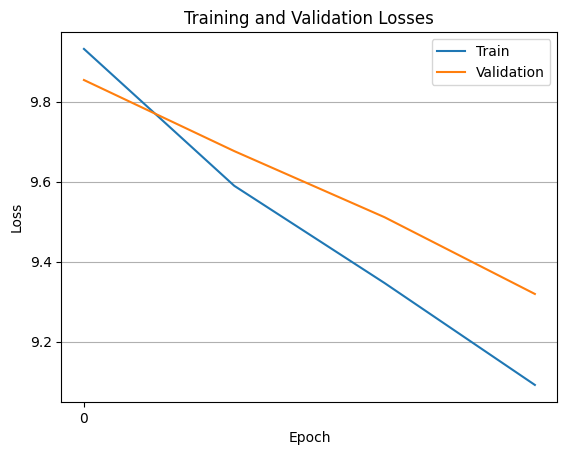

In [29]:
### PLOT LOSSES : TRANSFORMER

plot_losses(
    train_losses=train_losses_transformer, valid_losses=valid_losses_transformer
)


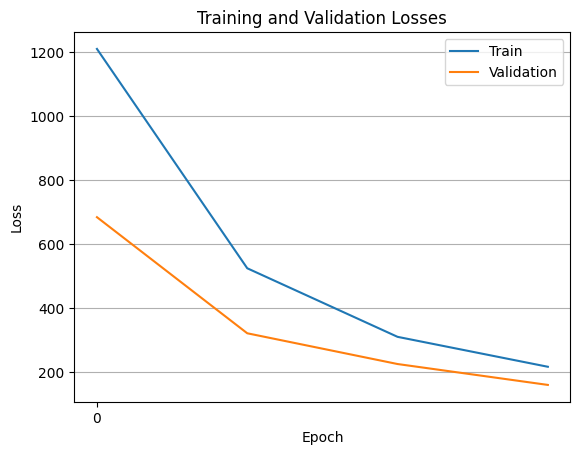

In [30]:
### PLOT LOSSES : DIFF TRANSFORMER

plot_losses(train_losses=train_losses_diff, valid_losses=valid_losses_diff)


#### **Evaluation**

In [31]:
### METRICS

print("TRANSFORMER --------------------------------")
print(f"ROUGE-1 Score : {pipeline_transformer.metrics['rouge_1']:.4f}")
print(f"ROUGE-L Score : {pipeline_transformer.metrics['rouge_l']:.4f}")
print("\n")
print("DIFF TRANSFORMER ---------------------------")
print(f"ROUGE-1 Score : {pipeline_diff.metrics['rouge_1']:.4f}")
print(f"ROUGE-L Score : {pipeline_diff.metrics['rouge_l']:.4f}")

TRANSFORMER --------------------------------
ROUGE-1 Score : 0.0081
ROUGE-L Score : 0.0081


DIFF TRANSFORMER ---------------------------
ROUGE-1 Score : 0.0065
ROUGE-L Score : 0.0065


In [32]:
### DIRECT TRANSLATION

text = "is"

translation_transformer = pipeline_transformer.model.translate(
    src_vocab=pipeline_transformer.src_vocab,
    tgt_vocab_reversed=pipeline_transformer.tgt_vocab_reversed,
    src_text=text,
)
translation_diff = pipeline_diff.model.translate(
    src_vocab=pipeline_diff.src_vocab,
    tgt_vocab_reversed=pipeline_diff.tgt_vocab_reversed,
    src_text=text,
)

print(f"Transformer translation : {translation_transformer}")
print(f"Diff Transformer translation : {translation_diff}")

Transformer translation : necrosees pochettes 50c dmv guterres 0129 antidopage proprietes korn militant israelensis souvent ara aquarecords obligera gcc pearl formaldehyde relegue jacques ducharme normales arabe pyr antitrust engage deplacent csr pcc nftc concentree dlg
Diff Transformer translation : bea00 clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage clonage
